In [ ]:
import os
os.chdir(os.path.join(os.getcwd(), 'asr', 'pipeline'))

In [28]:
import pandas as pd
data = pd.read_csv('data.csv')
#data = data.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
data = data.rename(columns={'Unnamed: 0':'index'})
data.head(2)

,index,file_path,words,word_count,spkID,bits_per_sample,encoding,num_channels,num_frames,sample_rate,duration_seconds,words_per_second
0,0291506962#-10505#SITHATIL#TCRCBD-E45#20220215...,/home/azureuser/cloudfiles/code/Users/neelan/a...,DAY CAN I PLEASE SPEAK TO HALEYSA NIM TAMBO SP...,231,#SITHATIL#TCRCBDE#,16,PCM_S,1,4804160,16000,300.26,0.769333
1,0301269833#-10505#BUSISIWEM26#TCR4-254782#2022...,/home/azureuser/cloudfiles/code/Users/neelan/a...,DAY CAN I PLEASE SPEAK TO MS YVONNE YOUR MR PR...,737,#BUSISIWEM#TCR#,16,PCM_S,1,5611200,16000,350.70,2.101511


In [12]:
data.columns

Index(['Unnamed: 0', 'file_path', 'words', 'word_count', 'spkID',
       'bits_per_sample', 'encoding', 'num_channels', 'num_frames',
       'sample_rate', 'duration_seconds', 'words_per_second'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd871427910>,
      dtype=object)

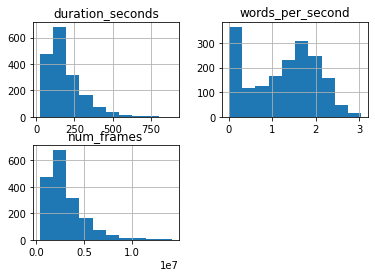

In [18]:
data[['duration_seconds','words_per_second','num_frames']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd870720670>,
      dtype=object)

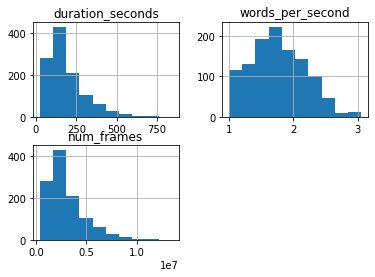

In [35]:
data_f1 = data[data['words_per_second']> 1]
data_f1_dropped = data[data['words_per_second'] <= 1]
data_f1.hist(['duration_seconds','words_per_second','num_frames'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd871203220>,
      dtype=object)

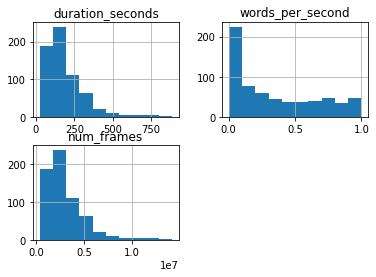

In [36]:
data_f1_dropped.hist(['duration_seconds','words_per_second','num_frames'])

In [43]:
# getting indexes for naive split (we manually put these in parse_to_json.py)
n = len(data_f1)
n_train = n//2
n_test = n_train + n//4

n_train, n_test, n

(567, 850, 1135)

In [46]:
train = data_f1[:n_train]
print(len(train))
valid = data_f1[n_train:n_test]
print(len(valid))
test = data_f1[n_test:]
print(len(test))

567
283
285


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd870034c10>,
      dtype=object)

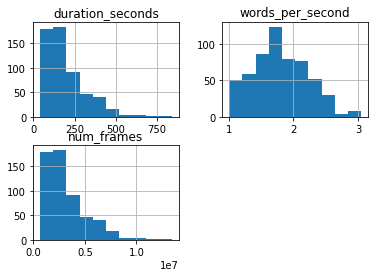

In [47]:
train.hist(['duration_seconds','words_per_second','num_frames'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd86d6910a0>,
      dtype=object)

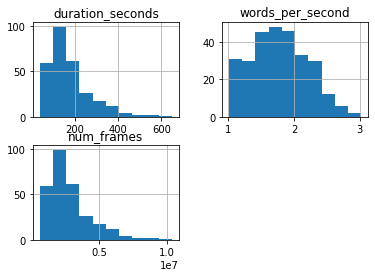

In [48]:
valid.hist(['duration_seconds','words_per_second','num_frames'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd86d537820>,
      dtype=object)

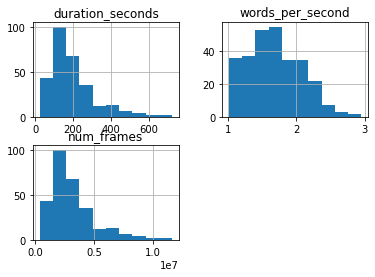

In [49]:
test.hist(['duration_seconds','words_per_second','num_frames'])